<a href="https://colab.research.google.com/github/kazars24/mfdp-emotion-detection/blob/main/course%20modules/2.%20Formulating%20the%20problem%20in%20terms%20of%20ML%20/2nd_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MFDP. Задача №2. Распознавание эмоций в маркетинговых исследованиях.**

## **Описание проекта**


Распознавание эмоций в маркетинговых исследованиях, или так называемый эмоциональный маркетинг, в последние годы только набирает обороты. Маркетологи пришли к выводу, что «эмоциональная» коммуникация с аудиторией повышает эффективность рекламной кампании, ведь потребители, выбирая тот или иной продукт, руководствуются своим восприятием вещи, ощущением от нее, сам же продукт как бы отходит на второй план. Именно поэтому в продвижении товара центральное место должна занимать эмоция, ассоциирующаяся с ним.

Эмоции – это то, что заставляет аудиторию покупать. Исследования, проведенные нейробиологом Антонио Дамасио, обнаружили, что люди с повреждением части мозга, вызывающей эмоции (другими словами, люди, которые не могут чувствовать эмоции), находят принятие решений чрезвычайно трудным занятием.

---

- *Потребители*: маркетологи.

- *User Story*: «Как пользователь, я хочу, чтобы при показе рекламных материалов маркетинговой тестовой группе получать информацию о том, какие кадры вызывают положительные или отрицательные эмоции, с целью повышения лояльности клиентов».

- *Бизнес-задача*: получить отчет о полученных эмоций во время просмотра рекламы, чтобы использовать это для изменения рекламных материлов и последующего повышения их привлекательности.

- *Эмоции*: гнев, отвращение, страх, счастье, грусть, удивление и нейтральное. Они объединяются в 3 основные группы: позитив (счастье, удивление), негатив (гнев, отвращение, страх, грусть), нейтральное.


### **Как я вижу сам сервис**



Скорее всего это будет какое-то ПО или веб-сервис. Его будут использовать маркетологи компаний во время тестовых показов рекламных материалов фокус-группе. Можно будет в реальном времени смореть какие эмоции испытывает человек. А в конце будет предоставлен отчет: какие эмоции были в процентном соотношени в период всего показа, для каждой из упомянутых выше эмоций будут сопоставлены кадры, которые эти эмоции вызывают.

## **Данные**

В случае файнтюнинга или обучения модели я планирую использовать следующие датасеты:
1. [ExpW](https://paperswithcode.com/dataset/expw)
2. [Facial Affect Dataset(short)](https://huggingface.co/datasets/Mauregato/affectnet_short)
3. [RAF Face Database](http://www.whdeng.cn/raf/model1.html)

### **Описание**

Набор данных Expression in-the-Wild (ExpW) предназначен для распознавания выражений лиц и содержит 91 793 лица, помеченныхвручную. Каждое из изображений лица помечено как одна из семи основных категорий выражения: “гнев”, “отвращение”, “страх”, “счастье”, “грусть”, “удивление” или “нейтральное”.

Лейблы содержат координаты баундинбокса лица класс, к которому относится эмоция.

for expression label：

"0" "angry"

"1" "disgust"

"2" "fear"

"3" "happy"

"4" "sad"

"5" "surprise"

"6" "neutral"

Лейблы записываются в формате:
`image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label`

## **Бизнесовые метрики**

Тут у меня возникли наибольшие трудности, но вот, что получилось собрать из статей и с просторов интернета.

**Положительный Эмоциональный След** - счастье, удивление.

**Отрицательный Эмоциональный След** - гнев, отвращение, страх, грусть.

**1. Индекс Эмоционального Опыта**

**ИЭО = (%ЭПК - %ЭНК)**

где

*   **%ЭПК** – доля контактов с положительным эмоциональным следом.
*   **%ЭНК** – доля контактов с отрицательным эмоциональным следом.

**2. Эмоциональный NPS (EmoNPS)**

**EmoNPS = %Вовлеченных - %Критичных - %«Молчунов» * K**

где

*   % Вовлеченных – доля Вовлеченных клиентов. Вовлеченные - клиенты, у которых во время контакта был зафиксирован положительный эмоциональный След.
*   % Критичных - доля Критичных клиентов. Критичные - клиенты, у которых во время контакта был зафиксирован отрицательный эмоциональный След.
*   % Молчунов – доля «Молчунов». Молчуны» – клиенты, которые испытывали нейтральные эмоции К от 0.2 до 1. Определяется эмпирически в зависимости от ряда факторов.

## **Задача в терминах ML**

Задача делится на 2 части:


1.   Object detection: нахождение лица на изображении.
2.   Многоклассовая классификация: классы эмоций.

На вход модели подается трехканальное изображение, после чего находятся координаты лица. Далее в bounding box классифицируется одна из 7 эмоций.


## **Бейзлайн**

In [ ]:
!pip install FER

In [ ]:
from fer import FER
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
detector = FER(mtcnn=True)

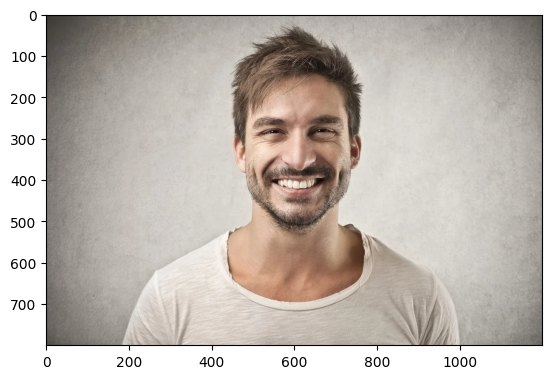

In [ ]:
test_image_one = plt.imread("/content/veselyj-chelovek.jpg")
plt.imshow(test_image_one)
plt.show()

In [ ]:
captured_emotions = detector.detect_emotions(test_image_one)
print(captured_emotions)

[{'box': [469, 135, 258, 363], 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 1.0, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.0}}]


В результате получаем координаты баундинбокса лица и словарь с вероятностями эмоций. Как видно, модель распознала эмоцию правильно.